In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd

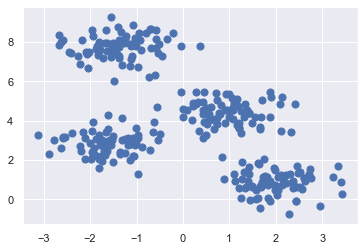

In [4]:
from sklearn.datasets import make_blobs
X, Y_true = make_blobs(n_samples= 300, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:,1], s=50)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

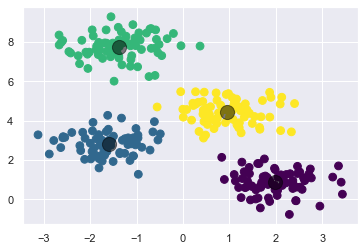

In [12]:
from sklearn.metrics import pairwise_distances_argmin


def find_clusters(X, n_clusters, rseed=2):
    # Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        #Find new centers from mean of points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
            
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:,0], X[:,1], c = y_kmeans, s=60, cmap = 'viridis')

plt.scatter(centers[:, 0], centers[:,1], c='black', s=200, alpha = 0.5)

In [14]:
y_kmeans

array([0, 2, 3, 2, 0, 0, 1, 3, 2, 2, 1, 2, 3, 2, 0, 3, 3, 0, 1, 1, 0, 0,
       3, 1, 1, 3, 0, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 0, 3, 1, 3, 3,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 1, 1, 1,
       2, 0, 2, 1, 3, 1, 2, 1, 1, 2, 1, 3, 0, 2, 0, 3, 0, 0, 2, 3, 0, 3,
       2, 2, 3, 0, 2, 1, 1, 3, 0, 0, 3, 1, 2, 0, 2, 0, 3, 0, 0, 3, 2, 3,
       1, 1, 0, 2, 0, 3, 2, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       1, 0, 2, 1, 1, 2, 3, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 2, 2, 3, 2, 3,
       0, 1, 2, 1, 0, 3, 2, 3, 3, 0, 3, 1, 1, 3, 0, 3, 3, 2, 0, 3, 1, 2,
       0, 0, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 0, 2, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 2, 3, 1, 0, 1, 3, 2, 1, 2, 3, 2, 3, 1, 3, 3, 2, 1, 1, 0, 0, 3,
       2, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 2, 3, 0, 1, 3, 0, 1, 2, 1, 0, 3,
       0, 2, 2, 2, 2, 1, 1, 2, 3, 1, 0, 3, 1, 1, 1, 0, 0, 2, 3, 3, 1, 0,
       2, 1, 3, 2, 3, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 2, 0, 0, 3, 0, 0, 0,
       2, 1, 2, 3, 0, 0, 2, 2, 2, 0, 0, 3, 2, 1])

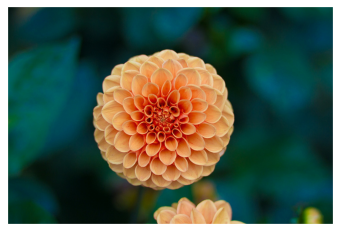

In [15]:
from sklearn.datasets import load_sample_image
china = load_sample_image('flower.jpg')
ax= plt.axes(xticks = [], yticks=[])
ax.imshow(china)

In [16]:
china.shape

(427, 640, 3)

In [19]:
data = china/250.0 # use 0......1 scale
data = data.reshape(427* 640,3)
data.shape

(273280, 3)

In [30]:
def plot_pixels(data, title, colors=None, N=1000):
    if colors is None:
        colors = data
        
        
        
        # choose a random subset
        
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R,G, B = data[i].T
        
        fig, ax = plt.subplots(1,2, figsize=(16,6))
        ax[0].scatter(R,G, color= colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
        
        ax[1].scatter(R,B, color= colors, marker= '.')
        ax[1].set(xlabel='Red', ylabel='Blue',xlim=(0,1), ylim=(0,1))
        
        
        fig.suptitle(title, size=20)

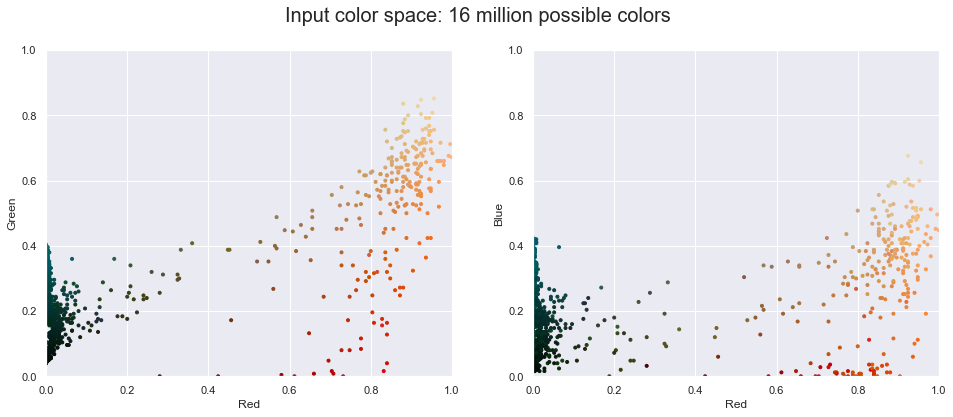

In [31]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [26]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]


plot_pixels(data, colors= new_colors,title='Reduced color space: 16 colors')

Text(0.5, 1.0, '16-color Image')

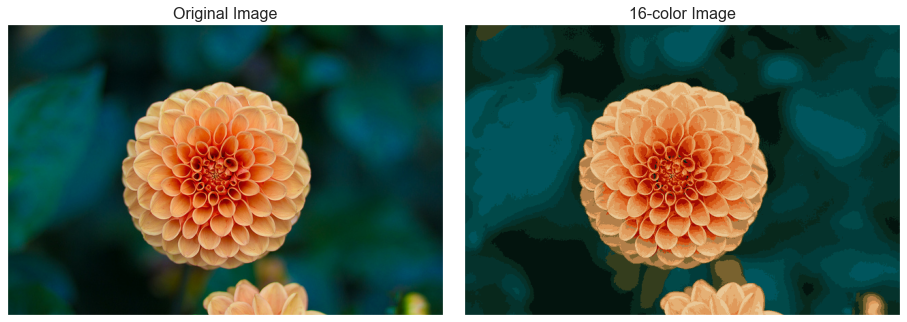

In [27]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1,2, figsize=(16,6),
                      subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image',size =16)